# GSSR
Gene Splice Site Recognition by WAM, Bayesian Network and SVM approaches

## Abstract
xxx

## Introduction

### Gene splice site
### Models
### Scipy and Pgmpy

## Material and Method

### Environment
### Data curation
### Feature encoding
### Model implements
### Evaluation

## Result and Discussion

### Weights for WAM
### Graph for BN
### Graph for SVM
### Performance
- Table
- ROC Sn-Sp Curves

### Discussion

In [7]:
import warnings
import import_ipynb
import numpy as np
import pandas as pd
import networkx as nx
from Utils import load_data
from Models import WAM, BN, SVM
from Evaluator import Evaluator
from matplotlib import pyplot as plt
from IPython.display import display

warnings.filterwarnings("ignore")

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Threshold,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
Sensitivity,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Specificity,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Threshold,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
Tpr,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fpr,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


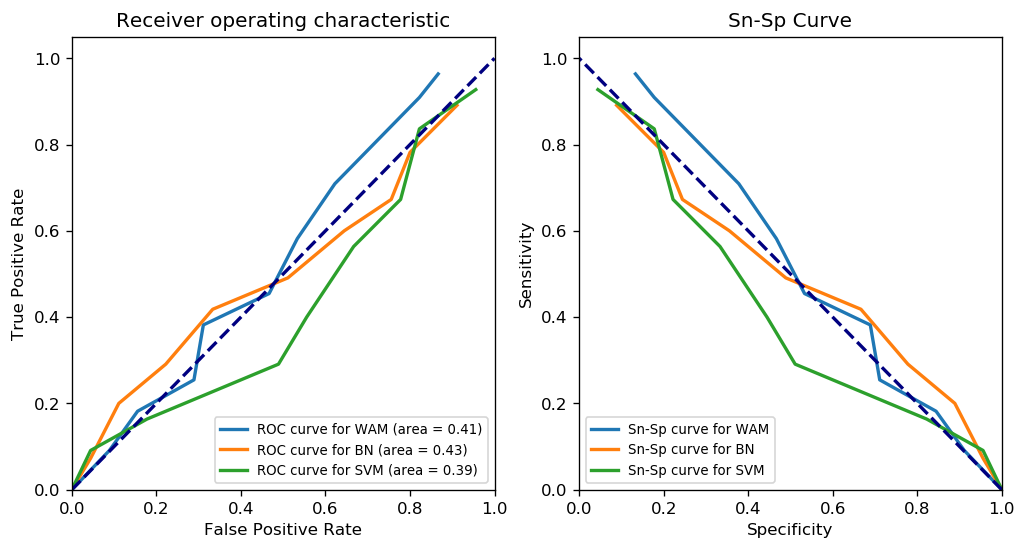

In [5]:
class Model:
    
    def __init__(self):
        self.wam = WAM()
        self.bn = BN()
        self.svm = SVM(kernel='rbf', gamma='scale', random_state=1, probability=True, verbose=True)
        
model = Model()

evaltr = Evaluator(labels=np.random.randint(0, 2, size=(100)), 
                  wam_scores=np.random.randint(0,10, size=(100)), 
                  bn_scores=np.random.randint(0,10, size=(100)), 
                  svm_scores=np.random.randint(0,10, size=(100)))

display(evaltr.Cal_Sn_Sp(evaltr.Confusion_table(T_range=np.arange(0, 10, 0.1))['wam_scores']).round(2).T)
display(evaltr.Cal_Tpr_Fpr(evaltr.Confusion_table(T_range=np.arange(0, 10, 0.1))['wam_scores']).round(2).T)
plt.figure(figsize=(10,5), dpi=120)
ax1 = plt.subplot(121)
evaltr.ROC_Curves(T_range=np.arange(0, 10, 0.1))
ax1 = plt.subplot(122)
evaltr.Sn_Sp_Curves(T_range=np.arange(0, 10, 0.1))

In [8]:
model.wam.fit(pd.Series(['ACCGGCCGGAATGTTCCGGAT', 'ACCGGCCGGATTGTTCCGGTT',
                         'CCCGGCCGGAATGTTCCGGAT', 'GGCGGCCGGATTGTTCCGGTT']),
          pd.Series([1, 1, 0, 0]))
display(model.wam.positive_weights.round(3))
display(model.wam.negative_weights.round(3))
model.wam.predict_probas(pd.Series(['ACCGGCCGGAATGTTCCGGAT', 'ACCGGCCGGATTGTTCCGGTT']))

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.048,0.217,0.053,0.043,0.053,0.032,0.032,0.053,0.04,0.043,0.032,0.04,0.053,0.043,0.043,0.04
3,0.048,0.043,0.053,0.043,0.053,0.161,0.032,0.053,0.04,0.043,0.032,0.04,0.053,0.043,0.043,0.04
4,0.048,0.043,0.053,0.043,0.053,0.032,0.161,0.053,0.04,0.043,0.032,0.04,0.053,0.043,0.043,0.04
5,0.048,0.043,0.053,0.043,0.053,0.032,0.032,0.053,0.04,0.043,0.161,0.04,0.053,0.043,0.043,0.04
6,0.048,0.043,0.053,0.043,0.053,0.032,0.032,0.053,0.04,0.217,0.032,0.04,0.053,0.043,0.043,0.04
7,0.048,0.043,0.053,0.043,0.053,0.161,0.032,0.053,0.04,0.043,0.032,0.04,0.053,0.043,0.043,0.04
8,0.048,0.043,0.053,0.043,0.053,0.032,0.161,0.053,0.04,0.043,0.032,0.04,0.053,0.043,0.043,0.04
9,0.048,0.043,0.053,0.043,0.053,0.032,0.032,0.053,0.04,0.043,0.161,0.04,0.053,0.043,0.043,0.04


,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.048,0.053,0.053,0.043,0.053,0.103,0.032,0.053,0.04,0.04,0.091,0.04,0.053,0.043,0.043,0.04
3,0.048,0.053,0.053,0.043,0.053,0.034,0.032,0.053,0.04,0.12,0.030,0.04,0.053,0.043,0.043,0.04
4,0.048,0.053,0.053,0.043,0.053,0.034,0.161,0.053,0.04,0.04,0.030,0.04,0.053,0.043,0.043,0.04
5,0.048,0.053,0.053,0.043,0.053,0.034,0.032,0.053,0.04,0.04,0.152,0.04,0.053,0.043,0.043,0.04
6,0.048,0.053,0.053,0.043,0.053,0.034,0.032,0.053,0.04,0.20,0.030,0.04,0.053,0.043,0.043,0.04
7,0.048,0.053,0.053,0.043,0.053,0.172,0.032,0.053,0.04,0.04,0.030,0.04,0.053,0.043,0.043,0.04
8,0.048,0.053,0.053,0.043,0.053,0.034,0.161,0.053,0.04,0.04,0.030,0.04,0.053,0.043,0.043,0.04
9,0.048,0.053,0.053,0.043,0.053,0.034,0.032,0.053,0.04,0.04,0.152,0.04,0.053,0.043,0.043,0.04


,Positive probability,Negative probability
0,2.951278e-15,1.331271e-16
1,2.479073e-15,1.118268e-16


In [9]:
data = np.random.randint(0, 2, size=(50, 10))
label = data.sum(axis=1)
test_data = np.random.randint(0, 2, size=(50, 10))
model.bn.fit(data, label=label, sign_level=0.01)

Performing structure learning, using estimator: `<class 'pgmpy.estimators.MmhcEstimator.MmhcEstimator'>`
Done !
Performing parameter learning, using estimator: `<class 'pgmpy.estimators.BayesianEstimator.BayesianEstimator'>`
